<a href="https://colab.research.google.com/github/BeautyKabore/Projects/blob/main/Linear_Regression/Regression_Project_Outline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Beauty Kabore

Linear Regression Project

## Introduction

This project runs a linear regression analysis using UCI's auto mpg dataset.
https://archive.ics.uci.edu/dataset/9/auto+mpgLinks


*   Dataset is multivariate in nature
*   Dataset contains 9 variables
*   mpg is the dependent variable

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

Quinlan,R.. (1993). Auto MPG. UCI Machine Learning Repository. https://doi.org/10.24432/C5859H.


### The Problem / Understanding the Context

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

### Main Goals

The model seeks to predict the value of mpg variable based on the other independent variables. The greater the linear relationship between the independent variable and mpg, the more accurate the prediction.

### Questions to Address

### End Product

### Prior Knowledge

## Data Preparation



In [51]:
# uci machine learning repository example
#install ucimlrepo

!pip install ucimlrepo

### Fields and Meanings

In [52]:
from ucimlrepo import fetch_ucirepo

# fetch iris dataset
mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = mpg.data.features
y = mpg.data.targets

# metadata
print(mpg.metadata)

# variable information
print(mpg.variables)

{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [53]:
# create dataframe from uci url
import pandas as pd
mpg_df=pd.read_csv(mpg.metadata.data_url)
print(mpg_df.shape)
print(mpg_df.info())
mpg_df.head()

(398, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car_name      398 non-null    object 
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   mpg           398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB
None


,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,"chevrolet,chevelle,malibu",8,307.0,130.0,3504,12.0,70,1,18.0
1,"buick,skylark,320",8,350.0,165.0,3693,11.5,70,1,15.0
2,"plymouth,satellite",8,318.0,150.0,3436,11.0,70,1,18.0
3,"amc,rebel,sst",8,304.0,150.0,3433,12.0,70,1,16.0
4,"ford,torino",8,302.0,140.0,3449,10.5,70,1,17.0


### List of Modifications

### Data Cleaning

In [54]:
# replace missing values and then check how many unique values are in each variable
few_values = [
    val for val in mpg_df.columns if len(mpg_df[val].fillna(0).unique()) == 1
]

few_values

[]

In [55]:
# quasi constant values (no constant values found)
for val in mpg_df.columns.sort_values():
    if (len(mpg_df[val].unique()) < 3):
        print(mpg_df[val].value_counts())

In [56]:
# duplicate rows - no duplicate rows found
mpg_df[mpg_df.duplicated(keep=False)]

,car_name,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg


In [57]:
# check of duplicate columns - none
duplicate_features = []
for i in range(0, len(mpg_df.columns)):
    orig = mpg_df.columns[i]

    for dupe in mpg_df.columns[i + 1:]:
        if mpg_df[orig].equals(mpg_df[dupe]):
            duplicate_features.append(dupe)
            print(f'{orig} looks the same as {dupe}')

duplicate_features

[]

### Missing Values

In [58]:
# check for nulls
mpg_df.isnull().sum()

car_name        0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

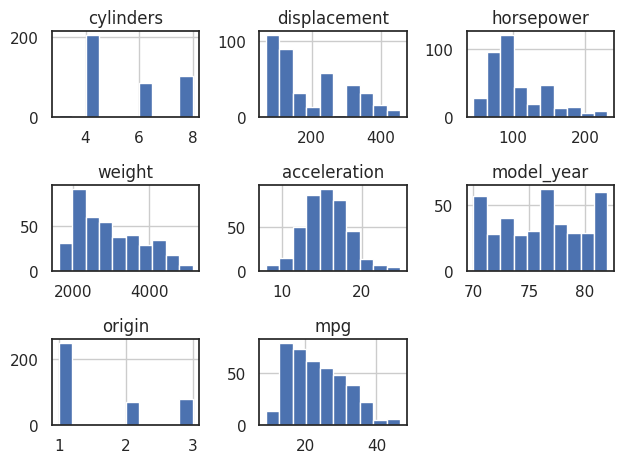

In [59]:
# look at the shape of variables that are numerical
import matplotlib.pyplot as plt

mpg_df.hist()
plt.tight_layout();

### Scaling

In [60]:
# impute missing values for horsepower with median because itd skewed
mpg_df['horsepower'].fillna(mpg_df['horsepower'].median(), inplace=True)
mpg_df.isnull().sum()

car_name        0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

## Exploratory Data Analysis


In [61]:
# describe
mpg_df.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864,23.514573
std,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


<Axes: xlabel='mpg'>

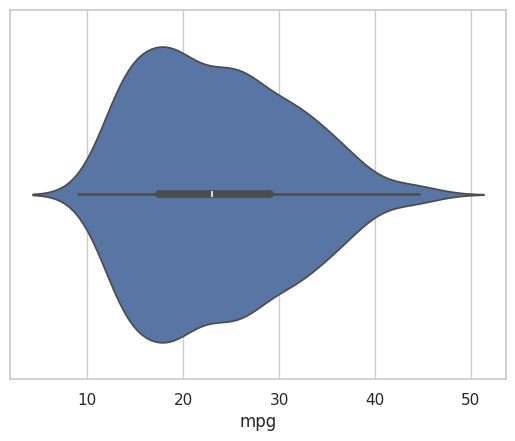

In [62]:
#violin plot
import seaborn

seaborn.set(style = 'whitegrid')

seaborn.violinplot(x ='mpg', data = mpg_df)

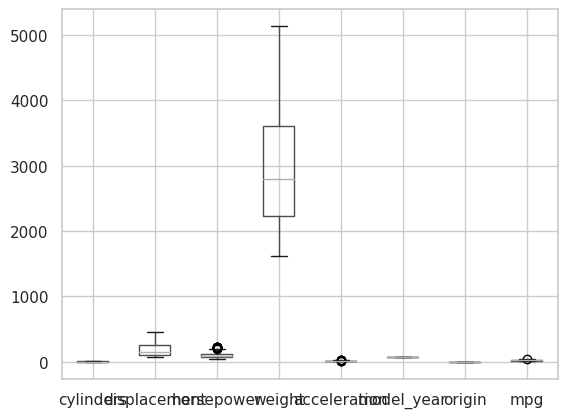

In [63]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
# Creating plot
mpg_df.boxplot()

# show plot
plt.show()

### Statistics

<ipython-input-64-f63e54675020>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = mpg_df.corr()


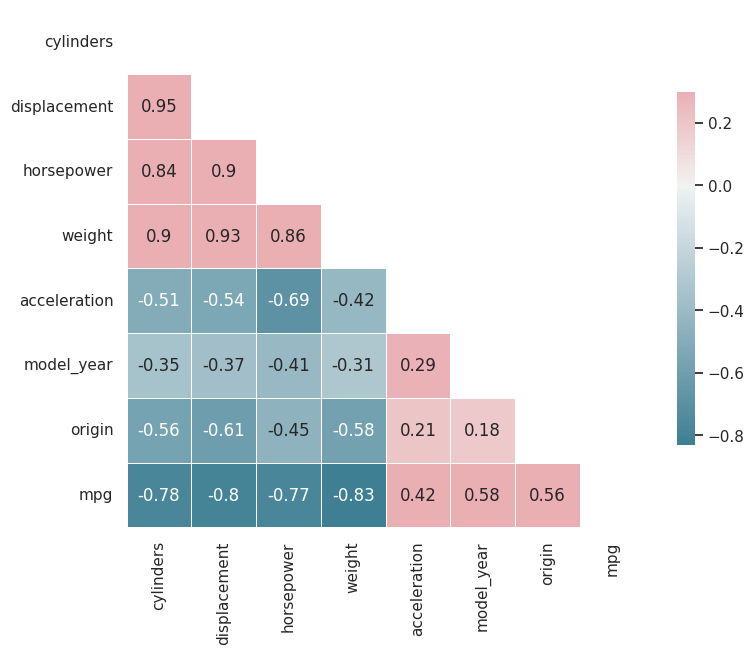

In [64]:
# Multicollinearity
#correlation heat map
import numpy as np
import seaborn as sns
from scipy import stats

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = mpg_df.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(8, 8))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

In [65]:
# delete one of the features out of the pair(s) that show multicollinearity ; correlation > .75
mpg_df.drop(['displacement', 'weight'], axis=1, inplace=True)

### Train Test Split

In [66]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mpg_df.drop(['mpg'], axis=1), mpg_df['mpg'], test_size=.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(318, 6)
(80, 6)


In [67]:
# quartiles
for feat in X_train._get_numeric_data().columns[1:]:
    q1 = X_train[feat].quantile(0.25)
    q3 = X_train[feat].quantile(0.75)
    iqr = q3 - q1
    lower_fence = (q1 - 1.5 * iqr)
    upper_fence = (q3 + 1.5 * iqr)
    lower_count = X_train[feat][X_train[feat] < lower_fence].count()
    upper_count = X_train[feat][X_train[feat] > upper_fence].count()
    print(f'{feat} outliers = {lower_count + upper_count}: lower_fence: {lower_fence}, upper_fence: {upper_fence}, lower_count: {lower_count}, upper_count: {upper_count}')

horsepower outliers = 11: lower_fence: 8.125, upper_fence: 187.125, lower_count: 0, upper_count: 11
acceleration outliers = 5: lower_fence: 8.8, upper_fence: 22.400000000000002, lower_count: 2, upper_count: 3
model_year outliers = 0: lower_fence: 64.0, upper_fence: 88.0, lower_count: 0, upper_count: 0
origin outliers = 0: lower_fence: -0.5, upper_fence: 3.5, lower_count: 0, upper_count: 0


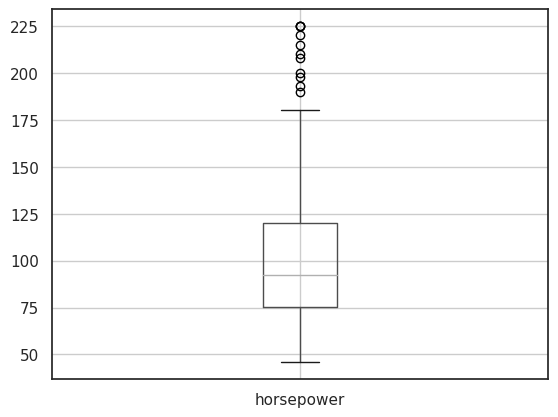

In [68]:
X_train.boxplot(column=['horsepower']);

In [69]:
# describe
X_train.describe()

,cylinders,horsepower,acceleration,model_year,origin
count,318.000000,318.000000,318.000000,318.000000,318.000000
mean,5.430818,103.130503,15.639937,76.103774,1.591195
std,1.684947,37.085324,2.763269,3.603177,0.811696
min,3.000000,46.000000,8.000000,70.000000,1.000000
25%,4.000000,75.250000,13.900000,73.000000,1.000000
50%,4.000000,92.500000,15.500000,76.000000,1.000000
75%,6.000000,120.000000,17.300000,79.000000,2.000000
max,8.000000,225.000000,24.800000,82.000000,3.000000


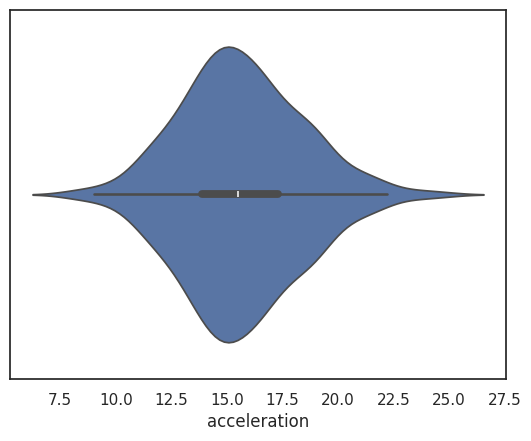

In [70]:
import seaborn as sns

sns.violinplot(x=X_train['acceleration']);

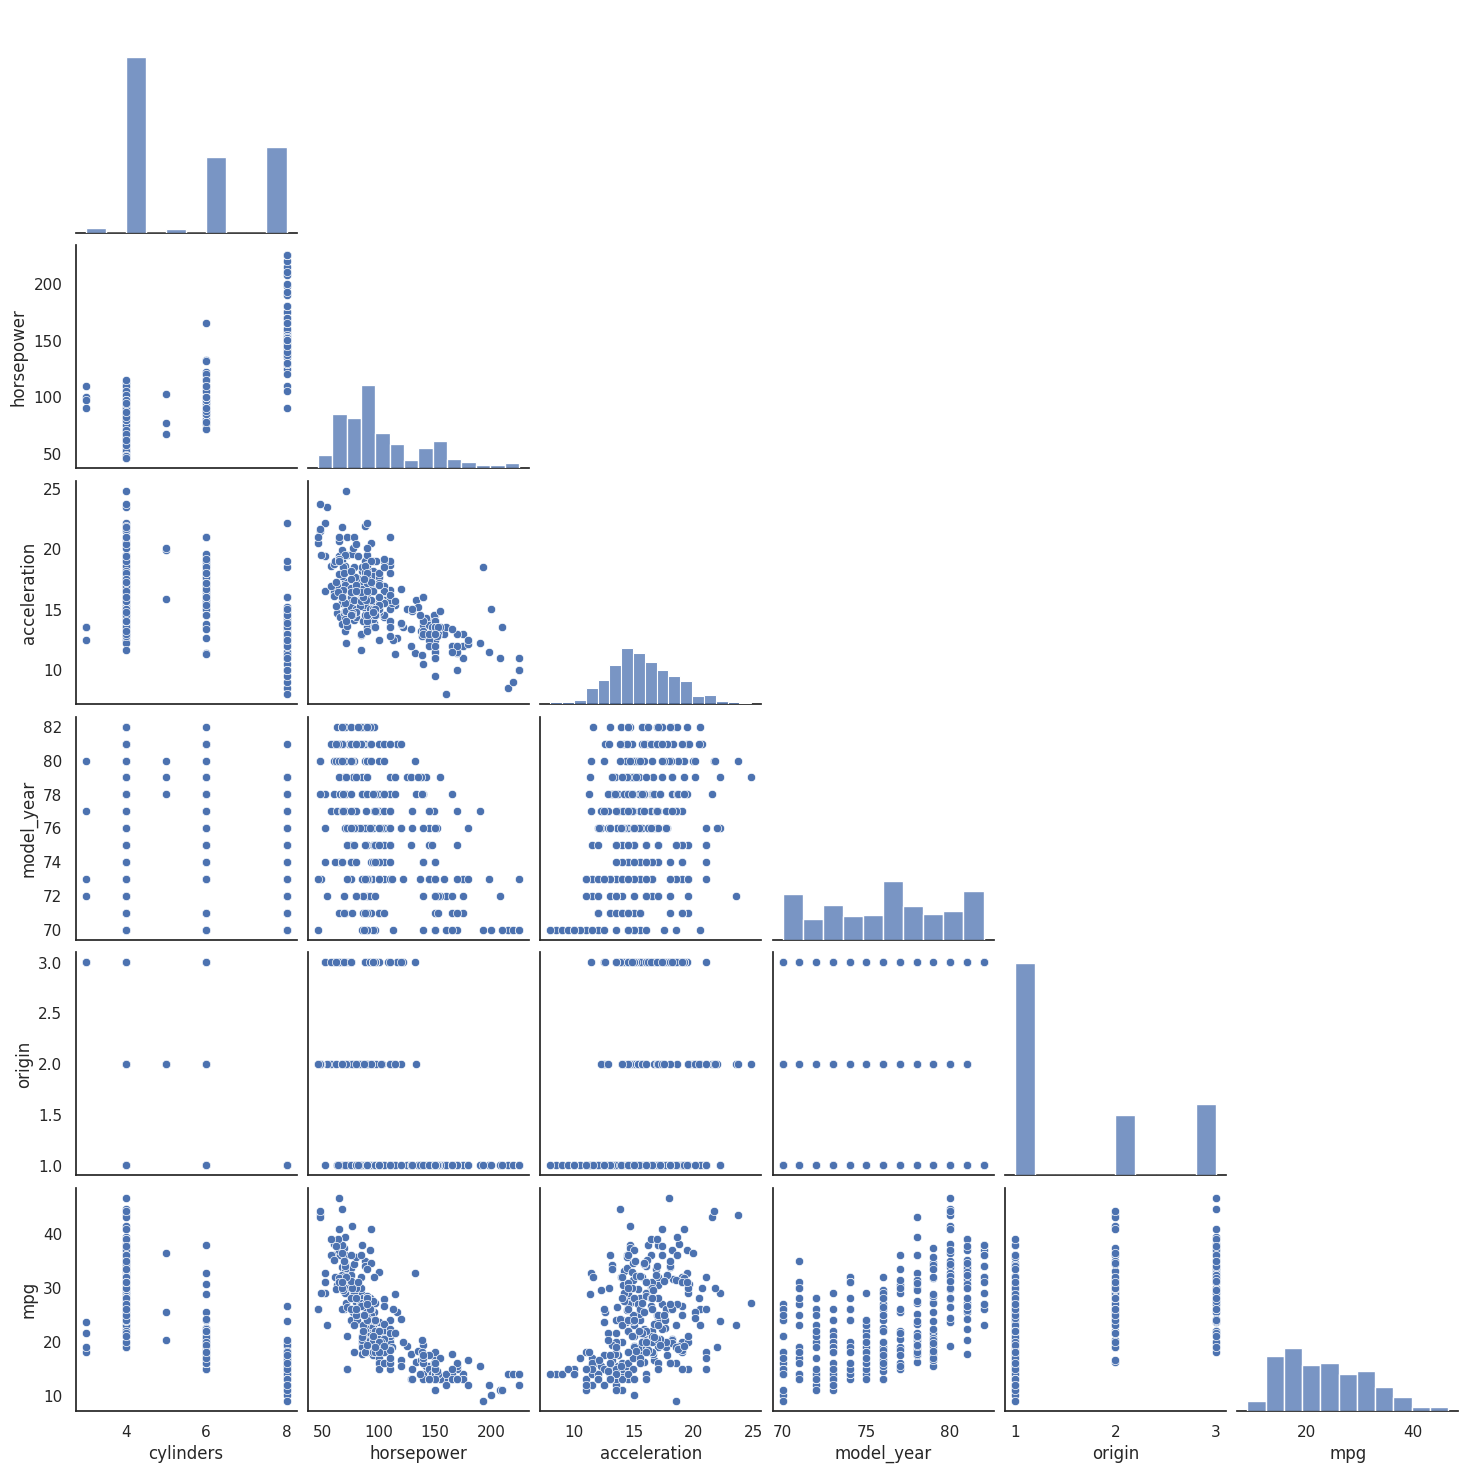

In [71]:
# sns pairplot
import seaborn as sns

eda_data = X_train.copy()
eda_data['mpg'] = y_train

sns.pairplot(data=eda_data, corner=True);

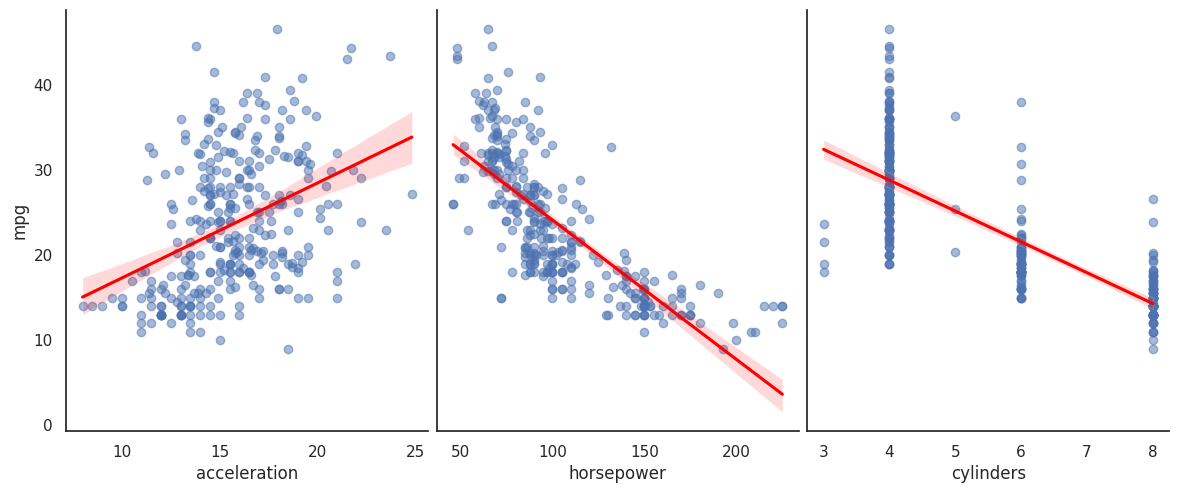

In [72]:
# scatter plots showing correlation
import pandas as pd
import seaborn as sns

sns.pairplot(data=eda_data, x_vars=['acceleration', 'horsepower', 'cylinders'], y_vars='mpg',
             kind='reg',
             height=5,
             aspect=0.8,
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}});

<ipython-input-73-5954cd8e1b60>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.corrwith(y_train).plot.bar(


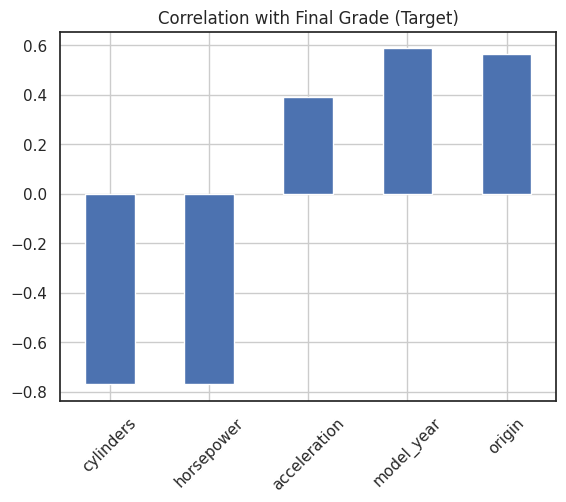

In [73]:
# correlation with target
X_train.corrwith(y_train).plot.bar(
        title = 'Correlation with Final Grade (Target)', rot = 45, grid = True);

In [78]:
# use sklearn one hot encoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories='auto', drop='first', sparse=False, handle_unknown='ignore')

carname_features = ['car_name']
ohe_train = ohe.fit_transform(X_train[carname_features])
ohe_train = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out(carname_features))
ohe_train.index = X_train.index
X_train = X_train.join(ohe_train)
X_train.drop(carname_features, axis=1, inplace=True)

ohe_test = ohe.transform(X_test[carname_features])
ohe_test = pd.DataFrame(ohe_test, columns=ohe.get_feature_names_out(carname_features))
ohe_test.index = X_test.index
X_test = X_test.join(ohe_test)
X_test.drop(carname_features, axis=1, inplace=True)

print(X_train.shape)
print(X_test.shape)
print(X_train.info())

(318, 251)
(80, 251)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 3 to 102
Columns: 251 entries, const to car_name_vw,rabbit,custom
dtypes: float64(247), int64(4)
memory usage: 634.2 KB
None


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


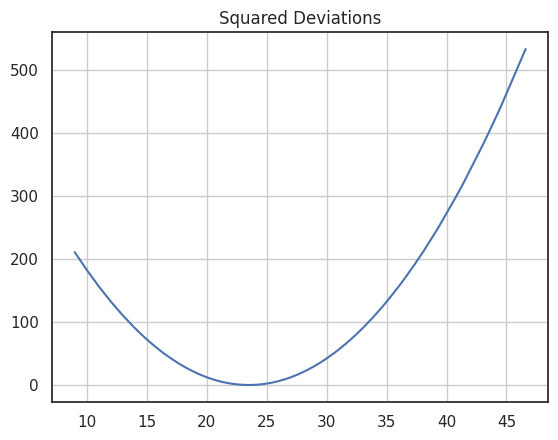

The mean of our data is 23.51.


In [79]:
# visualizing deviations from the mean squared
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm

#data = norm.rvs(size=10000)
x = sorted(np.array(mpg_df['mpg']))
y = [(i - np.mean(x))**2 for i in x]
plt.title('Squared Deviations')
plt.plot(x, y)
plt.grid()
plt.show()

print(f'The mean of our data is {round(np.mean(x), 2)}.')

In [75]:
print(X_train.head())

               car_name  cylinders  horsepower  acceleration  model_year  \
3         amc,rebel,sst          8       150.0          12.0          70   
18         datsun,pl510          4        88.0          14.5          70   
376  mazda,glc,custom,l          4        68.0          18.2          82   
248    honda,civic,cvcc          4        60.0          16.4          78   
177          audi,100ls          4        95.0          15.0          75   

     origin  
3         1  
18        3  
376       3  
248       3  
177       2  


### Model Comparisons

In [82]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     12.41
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           5.81e-24
Time:                        02:38:37   Log-Likelihood:                -498.99
No. Observations:                 318   AIC:                             1498.
Df Residuals:                      68   BIC:                             2438.
Df Model:                         249                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          9.0183     13.608      0.663      0.510     -18.136      36.173
cylinders                                     -1.9011      0.670     -2.836      0.006      -3.239      -0.563
horsepower                                    -0.0515      0.024     -2.131      0.037      -0.100      -0.003
acceleration                                  -0.5638      0.198     -2.843      0.006      -0.959      -0.168
model_year                                     0.4224      0.128      3.307      0.002       0.168       0.677
origin                                         3.5611      2.118      1.681      0.097      -0.666       7.788
car_name_amc,ambassador,sst                    3.4175      3.605      0.948      0.346      -3.775      10.610
car_name_amc,concord                           0.5499      3.695      0.149      0.882      -6.824       7.924
car_name_amc,concord,dl                       -0.2453      4.390     -0.056      0.956      -9.006       8.515
car_name_amc,concord,dl,6                      0.5473      3.938      0.139      0.890      -7.311       8.406
car_name_amc,gremlin                           1.4164      3.371      0.420      0.676      -5.310       8.143
car_name_amc,hornet                            1.4135      3.258      0.434      0.666      -5.089       7.916
car_name_amc,matador                          -0.2711      2.966     -0.091      0.927      -6.189       5.647
car_name_amc,pacer                             0.3605      3.940      0.092      0.927      -7.501       8.222
car_name_amc,pacer,d/l                        -0.8536      3.897     -0.219      0.827      -8.630       6.922
car_name_amc,rebel,sst                         3.5443      3.628      0.977      0.332      -3.696      10.785
car_name_amc,spirit,dl                         1.6264      4.550      0.357      0.722      -7.452      10.705
car_name_audi,100,ls                          -1.3000      3.092     -0.420      0.675      -7.470       4.870
car_name_audi,100ls                           -5.3353      2.410     -2.213      0.030     -10.145      -0.525
car_name_audi,4000                             4.8909      3.020      1.620      0.110      -1.135      10.916
car_name_audi,5000                            -5.0200      2.767     -1.814      0.074     -10.541       0.501
car_name_audi,5000s,(diesel)                  10.6372      2.904      3.663      0.000       4.842      16.432
car_name_bmw,2002                              0.7564      3.086      0.245      0.807      -5.402       6.915
car_name_bmw,320i                             -6.6860      3.021     -2.213      0.030     -12.714      -0.658
car_name_buick,century                         1.6119      3.408      0.473      0.638

In [83]:
# review model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     12.41
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           5.81e-24
Time:                        02:38:53   Log-Likelihood:                -498.99
No. Observations:                 318   AIC:                             1498.
Df Residuals:                      68   BIC:                             2438.
Df Model:                         249                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          9.0183     13.608      0.663      0.510     -18.136      36.173
cylinders                                     -1.9011      0.670     -2.836      0.006      -3.239      -0.563
horsepower                                    -0.0515      0.024     -2.131      0.037      -0.100      -0.003
acceleration                                  -0.5638      0.198     -2.843      0.006      -0.959      -0.168
model_year                                     0.4224      0.128      3.307      0.002       0.168       0.677
origin                                         3.5611      2.118      1.681      0.097      -0.666       7.788
car_name_amc,ambassador,sst                    3.4175      3.605      0.948      0.346      -3.775      10.610
car_name_amc,concord                           0.5499      3.695      0.149      0.882      -6.824       7.924
car_name_amc,concord,dl                       -0.2453      4.390     -0.056      0.956      -9.006       8.515
car_name_amc,concord,dl,6                      0.5473      3.938      0.139      0.890      -7.311       8.406
car_name_amc,gremlin                           1.4164      3.371      0.420      0.676      -5.310       8.143
car_name_amc,hornet                            1.4135      3.258      0.434      0.666      -5.089       7.916
car_name_amc,matador                          -0.2711      2.966     -0.091      0.927      -6.189       5.647
car_name_amc,pacer                             0.3605      3.940      0.092      0.927      -7.501       8.222
car_name_amc,pacer,d/l                        -0.8536      3.897     -0.219      0.827      -8.630       6.922
car_name_amc,rebel,sst                         3.5443      3.628      0.977      0.332      -3.696      10.785
car_name_amc,spirit,dl                         1.6264      4.550      0.357      0.722      -7.452      10.705
car_name_audi,100,ls                          -1.3000      3.092     -0.420      0.675      -7.470       4.870
car_name_audi,100ls                           -5.3353      2.410     -2.213      0.030     -10.145      -0.525
car_name_audi,4000                             4.8909      3.020      1.620      0.110      -1.135      10.916
car_name_audi,5000                            -5.0200      2.767     -1.814      0.074     -10.541       0.501
car_name_audi,5000s,(diesel)                  10.6372      2.904      3.663      0.000       4.842      16.432
car_name_bmw,2002                              0.7564      3.086      0.245      0.807      -5.402       6.915
car_name_bmw,320i                             -6.6860      3.021     -2.213      0.030     -12.714      -0.658
car_name_buick,century                         1.6119      3.408      0.473      0.638

In [84]:
# lasso example
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X_train)
y = y_train
names = X_train.columns

lasso = Lasso(alpha=8)
lasso.fit(X, y)

d = {'Feature': names, 'Coeff': lasso.coef_}
lasso_df = pd.DataFrame(mpg_df)
print(lasso_df[1:])

               car_name  cylinders  horsepower  acceleration  model_year  \
1     buick,skylark,320          8       165.0          11.5          70   
2    plymouth,satellite          8       150.0          11.0          70   
3         amc,rebel,sst          8       150.0          12.0          70   
4           ford,torino          8       140.0          10.5          70   
5      ford,galaxie,500          8       198.0          10.0          70   
..                  ...        ...         ...           ...         ...   
393     ford,mustang,gl          4        86.0          15.6          82   
394           vw,pickup          4        52.0          24.6          82   
395       dodge,rampage          4        84.0          11.6          82   
396         ford,ranger          4        79.0          18.6          82   
397          chevy,s-10          4        82.0          19.4          82   

     origin   mpg  
1         1  15.0  
2         1  18.0  
3         1  16.0  
4      

In [88]:
# what ever you do for X_train do for X_test
X_train = X_train[['origin', 'cylinders', 'acceleration', 'horsepower', 'model_year']]
X_test = X_test[['origin', 'cylinders', 'acceleration', 'horsepower', 'model_year']]

In [92]:
# create and train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# test set prediction results
yhat = model.predict(X_test)
print('r squared: ', model.score(X_train, y_train))

r squared:  0.7617885534038774


## Going Forward

* Explore ways of increasing r squared to better the model.